# Importing Libraries

In [2]:
!pip install folium

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import folium
import json

In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# Importing Data

In [5]:
# Import .json file for US States
country_geo = r'C:\Users\Aaron\CareerFoundry\Achievement 6\02 Data\Original Data\us-states.json'

In [6]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\Aaron\CareerFoundry\Achievement 6\02 Data\Original Data\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

#### Creating path variable

In [7]:
path = r'C:\Users\Aaron\CareerFoundry\Achievement 6'

In [8]:
# Importing updated 'MLB Players Salaries and Performance' dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'salaries_cleaned_data.csv'), index_col = False)

In [9]:
# Checking the dataset
df.head()

,Unnamed: 0,salary,name,total_value,pos,length,years,avg_annual,team,city,state,country
0,0,6500000,Giancarlo Stanton,325000000,RF,13,2015-27,25000000,MIA,Miami,Florida,USA
1,1,21943026,Miguel Cabrera,292000000,1B,10,2014-23,29200000,DET,Detroit,Michigan,USA
2,2,22000000,Miguel Cabrera,292000000,1B,10,2014-23,29200000,DET,Detroit,Michigan,USA
3,3,28000000,Alex Rodriguez,275000000,DH,10,2008-17,27500000,NYY,Bronx,New York,USA
4,4,33000000,Alex Rodriguez,275000000,DH,10,2008-17,27500000,NYY,Bronx,New York,USA


### Removing 'Unnamed: 0' Column

In [10]:
df = df.drop(columns = 'Unnamed: 0')

In [11]:
# Checking our Work
df.head()

,salary,name,total_value,pos,length,years,avg_annual,team,city,state,country
0,6500000,Giancarlo Stanton,325000000,RF,13,2015-27,25000000,MIA,Miami,Florida,USA
1,21943026,Miguel Cabrera,292000000,1B,10,2014-23,29200000,DET,Detroit,Michigan,USA
2,22000000,Miguel Cabrera,292000000,1B,10,2014-23,29200000,DET,Detroit,Michigan,USA
3,28000000,Alex Rodriguez,275000000,DH,10,2008-17,27500000,NYY,Bronx,New York,USA
4,33000000,Alex Rodriguez,275000000,DH,10,2008-17,27500000,NYY,Bronx,New York,USA


### Understanding Our Dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22705 entries, 0 to 22704
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   salary       22705 non-null  int64 
 1   name         22705 non-null  object
 2   total_value  22705 non-null  int64 
 3   pos          22705 non-null  object
 4   length       22705 non-null  int64 
 5   years        22705 non-null  object
 6   avg_annual   22705 non-null  int64 
 7   team         22705 non-null  object
 8   city         22705 non-null  object
 9   state        22705 non-null  object
 10  country      22705 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB


In [13]:
df.describe()

,salary,total_value,length,avg_annual
count,2.270500e+04,2.270500e+04,22705.000000,2.270500e+04
mean,2.152284e+06,3.708879e+06,1.125875,2.194980e+06
std,3.352784e+06,1.423080e+07,0.751445,3.455491e+06
min,6.250000e+04,6.250000e+04,1.000000,6.250000e+04
25%,3.160000e+05,3.160000e+05,1.000000,3.160000e+05
50%,6.250000e+05,6.350000e+05,1.000000,6.350000e+05
75%,2.600000e+06,2.700000e+06,1.000000,2.633333e+06
max,3.300000e+07,3.250000e+08,13.000000,4.000000e+07


# 5) Wrangle Data to meet Analysis Needs

### Splitting 'years' Column

In [14]:
# Split the 'years' column and keep only the first part
df['years'] = df['years'].str.split('-').str[0]

In [15]:
# Checking our updated data
df.head()

,salary,name,total_value,pos,length,years,avg_annual,team,city,state,country
0,6500000,Giancarlo Stanton,325000000,RF,13,2015,25000000,MIA,Miami,Florida,USA
1,21943026,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
2,22000000,Miguel Cabrera,292000000,1B,10,2014,29200000,DET,Detroit,Michigan,USA
3,28000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA
4,33000000,Alex Rodriguez,275000000,DH,10,2008,27500000,NYY,Bronx,New York,USA


### Changing 'years' Datatype to 'int'

In [16]:
df['years'] = df['years'].astype(int)

In [17]:
# Checking our updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22705 entries, 0 to 22704
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   salary       22705 non-null  int64 
 1   name         22705 non-null  object
 2   total_value  22705 non-null  int64 
 3   pos          22705 non-null  object
 4   length       22705 non-null  int64 
 5   years        22705 non-null  int32 
 6   avg_annual   22705 non-null  int64 
 7   team         22705 non-null  object
 8   city         22705 non-null  object
 9   state        22705 non-null  object
 10  country      22705 non-null  object
dtypes: int32(1), int64(4), object(6)
memory usage: 1.8+ MB


### Renaming 'avg_annual '

In [18]:
# The original column name had a space after it
df.rename(columns = {'avg_annual ' : 'avg_annual'}, inplace = True)

In [19]:
# Checking our work
df.columns

Index(['salary', 'name', 'total_value', 'pos', 'length', 'years', 'avg_annual',
       'team', 'city', 'state', 'country'],
      dtype='object')

## In order to make our dataset more current, I'll remove data that is older than 10 years.

Since this data set includes salaries from 1988 - 2016, our updated data will only included salaries from 2006 - 2016.

In [20]:
recent_df = df[df['years'] >= 2006]

In [21]:
# Checking our updated data
# Minimum value for 'years' should be 2006
recent_df.describe()

,salary,total_value,length,years,avg_annual
count,8.180000e+03,8.180000e+03,8180.000000,8180.000000,8.180000e+03
mean,3.309245e+06,7.629844e+06,1.349389,2010.334474,3.427757e+06
std,4.420520e+06,2.299034e+07,1.220392,2.796800,4.604217e+06
min,3.270000e+05,3.270000e+05,1.000000,2006.000000,3.270000e+05
25%,4.860000e+05,4.864250e+05,1.000000,2008.000000,4.864250e+05
50%,1.143928e+06,1.200000e+06,1.000000,2010.000000,1.200000e+06
75%,4.356250e+06,5.066626e+06,1.000000,2013.000000,4.570832e+06
max,3.300000e+07,3.250000e+08,13.000000,2016.000000,4.000000e+07


## Creating New Dataframes to Fit Analysis Needs

#### Total Value (average)

In [22]:
# Creating a new dataframe where states are grouped
# 'total_value' has also been averaged out for every state
state_totals = recent_df.groupby('state')['total_value'].mean().reset_index()

In [23]:
# Checking the new dataframe
state_totals.head()

,state,total_value
0,Arizona,4.590088e+06
1,California,9.311855e+06
2,Colorado,7.171002e+06
3,Florida,4.052244e+06
4,Georgia,6.067516e+06


#### Avg Annual (average)

In [24]:
# Creating a new dataframe where states are grouped
# 'avg_annual' has been averaged out for every state
state_avg = recent_df.groupby('state')['avg_annual'].mean().reset_index()

In [25]:
# Checking
state_avg.head()

,state,avg_annual
0,Arizona,2.653054e+06
1,California,3.683469e+06
2,Colorado,2.831324e+06
3,Florida,2.013492e+06
4,Georgia,3.214443e+06


#### Merging state_totals and state_avg

In [26]:
# Merging the two new dataframes
state_values = state_totals.merge(state_avg[['state', 'avg_annual']], on='state')

In [27]:
# Checking the updated 'state_values' dataframe
state_values.head()

,state,total_value,avg_annual
0,Arizona,4.590088e+06,2.653054e+06
1,California,9.311855e+06,3.683469e+06
2,Colorado,7.171002e+06,2.831324e+06
3,Florida,4.052244e+06,2.013492e+06
4,Georgia,6.067516e+06,3.214443e+06


#### Length (average)

In [28]:
# Creating a new dataframe where states are grouped
# 'length' has been averaged out for every state
state_length = recent_df.groupby('state')['length'].mean().reset_index()

In [29]:
# Checking
state_length.head()

,state,length
0,Arizona,1.253731
1,California,1.402151
2,Colorado,1.358974
3,Florida,1.238182
4,Georgia,1.294545


#### Merging state_values and state_length

In [30]:
# Including state_length into state_values dataset
state_values_2 = state_values.merge(state_length[['state', 'length']], on='state')

In [31]:
# Checking the new data set
state_values_2.head()

,state,total_value,avg_annual,length
0,Arizona,4.590088e+06,2.653054e+06,1.253731
1,California,9.311855e+06,3.683469e+06,1.402151
2,Colorado,7.171002e+06,2.831324e+06,1.358974
3,Florida,4.052244e+06,2.013492e+06,1.238182
4,Georgia,6.067516e+06,3.214443e+06,1.294545


# 6) Clean Data Set

#### Checking for Missing Values

In [32]:
state_values_2.isnull().sum()

state          0
total_value    0
avg_annual     0
length         0
dtype: int64

#### Checking for Duplicates

In [33]:
dups = state_values_2.duplicated()

In [34]:
dups.shape

(18,)

No duplicates!

### Extreme Values Checks

#### Total Value

<AxesSubplot:xlabel='total_value', ylabel='Count'>

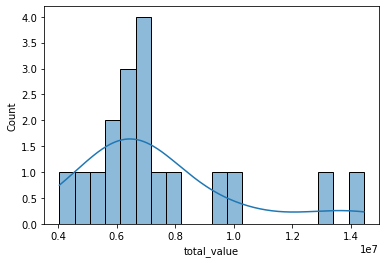

In [35]:
sns.histplot(state_values_2['total_value'], bins=20, kde = True)

In [36]:
# Check how many extreme values

state_values_2[state_values_2['total_value'] > 1000000]

,state,total_value,avg_annual,length
0,Arizona,4.590088e+06,2.653054e+06,1.253731
1,California,9.311855e+06,3.683469e+06,1.402151
2,Colorado,7.171002e+06,2.831324e+06,1.358974
3,Florida,4.052244e+06,2.013492e+06,1.238182
4,Georgia,6.067516e+06,3.214443e+06,1.294545
5,Illinois,7.811331e+06,4.015599e+06,1.376953
6,Maryland,6.747148e+06,3.001968e+06,1.331551
7,Massachusetts,9.920837e+06,5.183600e+06,1.461538
8,Michigan,1.443436e+07,4.680321e+06,1.522222
9,Minnesota,5.205713e+06,2.719596e+06,1.232000


No out of the ordinary outliers here.

#### Avg Annual

<AxesSubplot:xlabel='avg_annual', ylabel='Count'>

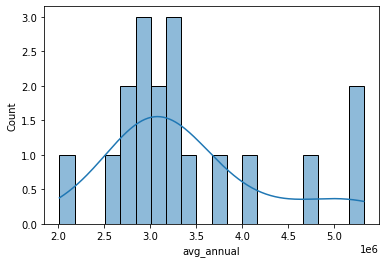

In [37]:
sns.histplot(state_values_2['avg_annual'], bins=20, kde = True)

In [38]:
# Check how many extreme values

state_values_2[state_values_2['avg_annual'] > 100000]

,state,total_value,avg_annual,length
0,Arizona,4.590088e+06,2.653054e+06,1.253731
1,California,9.311855e+06,3.683469e+06,1.402151
2,Colorado,7.171002e+06,2.831324e+06,1.358974
3,Florida,4.052244e+06,2.013492e+06,1.238182
4,Georgia,6.067516e+06,3.214443e+06,1.294545
5,Illinois,7.811331e+06,4.015599e+06,1.376953
6,Maryland,6.747148e+06,3.001968e+06,1.331551
7,Massachusetts,9.920837e+06,5.183600e+06,1.461538
8,Michigan,1.443436e+07,4.680321e+06,1.522222
9,Minnesota,5.205713e+06,2.719596e+06,1.232000


No out of the ordinary outliers.

#### Length

<AxesSubplot:xlabel='length', ylabel='Count'>

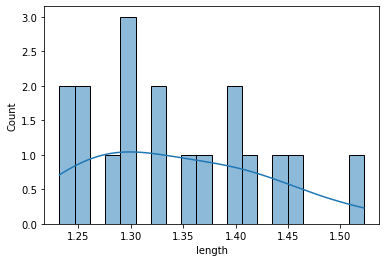

In [39]:
sns.histplot(state_values_2['length'], bins=20, kde = True)

In [40]:
# Check how many extreme values

state_values_2[state_values_2['length'] < 2]

,state,total_value,avg_annual,length
0,Arizona,4.590088e+06,2.653054e+06,1.253731
1,California,9.311855e+06,3.683469e+06,1.402151
2,Colorado,7.171002e+06,2.831324e+06,1.358974
3,Florida,4.052244e+06,2.013492e+06,1.238182
4,Georgia,6.067516e+06,3.214443e+06,1.294545
5,Illinois,7.811331e+06,4.015599e+06,1.376953
6,Maryland,6.747148e+06,3.001968e+06,1.331551
7,Massachusetts,9.920837e+06,5.183600e+06,1.461538
8,Michigan,1.443436e+07,4.680321e+06,1.522222
9,Minnesota,5.205713e+06,2.719596e+06,1.232000


No out of the ordinary outliers here.

# 7) Creating a Choropleth Map

Reminder of what our updated dataset looks like:

In [41]:
state_values_2.head()

,state,total_value,avg_annual,length
0,Arizona,4.590088e+06,2.653054e+06,1.253731
1,California,9.311855e+06,3.683469e+06,1.402151
2,Colorado,7.171002e+06,2.831324e+06,1.358974
3,Florida,4.052244e+06,2.013492e+06,1.238182
4,Georgia,6.067516e+06,3.214443e+06,1.294545


## Choropleth Map for States and Total Value

In [42]:
# Create a dataframe with just the columns we'd like to plot
data_to_plot_1 = state_values_2[['state', 'total_value']]

In [43]:
# Checking the new dataframe
data_to_plot_1.head()

,state,total_value
0,Arizona,4.590088e+06
1,California,9.311855e+06
2,Colorado,7.171002e+06
3,Florida,4.052244e+06
4,Georgia,6.067516e+06


In [44]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_1,
    columns = ['state', 'total_value'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "total_value").add_to(map)
folium.LayerControl().add_to(map)

map

#### This map highlights which states have the HIGHEST average total value.

Reminder that total value measures the total value of a player's contract. This map shows us that on average, New York and Michigan offer the largest contracts.

States that are colored in Dark Gray don't contain data because there are no MLB teams located within it.

## Choropleth Map for States and Avg Annual

In [45]:
# Create a dataframe with just the columns we'd like to plot
data_to_plot_2 = state_values_2[['state', 'avg_annual']]

In [46]:
# Checking the new dataframe
data_to_plot_2.head()

,state,avg_annual
0,Arizona,2.653054e+06
1,California,3.683469e+06
2,Colorado,2.831324e+06
3,Florida,2.013492e+06
4,Georgia,3.214443e+06


In [47]:
# Setup a folium map at a high-level zoom
map_2 = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_2,
    columns = ['state', 'avg_annual'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "avg_annual").add_to(map_2)
folium.LayerControl().add_to(map_2)

map_2

#### This map highlights which states have the HIGHEST annual average.

We can see that New York and Massachusetts are the top 2 states that offer the largest annual averages for their contracts.

States that are colored in Dark Gray don't contain data because there are no MLB teams located within it.

## Choropleth Map for States and Length

In [48]:
# Create a dataframe with just the columns we'd like to plot
data_to_plot_3 = state_values_2[['state', 'length']]

In [49]:
# Checking the new dataframe
data_to_plot_3.head()

,state,length
0,Arizona,1.253731
1,California,1.402151
2,Colorado,1.358974
3,Florida,1.238182
4,Georgia,1.294545


In [50]:
# Setup a folium map at a high-level zoom
map_3 = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_3,
    columns = ['state', 'length'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "length").add_to(map_3)
folium.LayerControl().add_to(map_3)

map_3

#### This map highlights which states have the LONGEST average contract lengths.

We can see that on average, Michigan offers the longest contracts in MLB.

States that are colored in Dark Gray don't contain data because there are no MLB teams located within it.

# 8) Answering Questions

#### On average, which states spend more on player contracts?
Within the past 10 years, Michigan has offered the largest contracts. They are followed by New York in second, and Massachusetts for third.

However, annually, New York pays the most on average for each contract they've signed.

#### More recently, within the past 10 years, which position gets paid the most?
Unable to answer with geospatial analysis.

#### Within this data set, who are the top 5 players that have been awarded the largest total value contract?
Unable to answer with geospatial analysis.

# Exporting updated datasets

In [51]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'salaries_UPDATED.csv'))

In [52]:
recent_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'recent_salaries.csv'))